In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

## 1. 데이터 불러오기

### Boston Housing Dataset

- 보스턴 주택 가격 데이터
- 1978년에 발표된 데이터로 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 정리
- 총 13가지의 요소들과 주택 가격으로 이루어져 있음.

### 데이터 호출

In [6]:
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
X_boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y_boston = raw_df.values[1::2, 2]
column_names = ['CRM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_18324\1469471495.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)


### 데이터 분할
- Training set 70%, Test set 30% 무작위 추출을 이용하여 나누기


In [9]:
X_train, X_test, y_train, y_test = \
train_test_split(X_boston, y_boston,
                 test_size = 0.3, random_state=123)

In [13]:
X_train

array([[2.21880e-01, 2.00000e+01, 6.96000e+00, ..., 1.86000e+01,
        3.90770e+02, 6.58000e+00],
       [5.36000e-02, 2.10000e+01, 5.64000e+00, ..., 1.68000e+01,
        3.96900e+02, 5.28000e+00],
       [6.88800e-02, 0.00000e+00, 2.46000e+00, ..., 1.78000e+01,
        3.96900e+02, 9.45000e+00],
       ...,
       [3.51140e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
        3.96900e+02, 7.70000e+00],
       [9.18702e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 2.36000e+01],
       [4.55587e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.54700e+02, 7.12000e+00]])

In [15]:
y_train

array([35.2, 25. , 36.2, 16.1, 10.9, 36.4, 25. , 20.1, 16.8, 23.7, 42.3,
       17.9, 12.7, 50. , 18.4, 33.4, 22.9, 14.6, 29.9, 22.6, 22.5, 29. ,
       50. , 37.9, 21.4, 29.4, 20.3, 23. , 30.1, 21.7, 36.5, 25. , 24.5,
       37.3, 33.8, 24.7, 32.7, 23.1, 25.1, 21.7, 13.4, 24.8, 12.7, 11.8,
        8.3, 20.2, 41.3, 23.2, 23.1, 24.3, 19.3, 10.8, 18.6, 29. , 23.9,
       19.5, 13.1, 31.7, 21. , 18.2, 21. , 21.2, 14.1, 33.2, 13.8, 19.9,
       21.7, 20.6, 21.2, 13.6, 18.9, 18. , 24.1, 28.7, 23.4, 15.2, 23.6,
       13.8, 11.7, 16.3, 50. , 13.5, 50. , 31.5, 22.6, 12.1, 21.7, 14.1,
       22.4, 13.4, 33.1, 20.6,  8.3, 36.2,  6.3, 21.5, 23.3, 24. , 19.1,
       29.6, 27.9, 16.2,  9.5, 24.6, 15.6,  8.1, 15.3, 19. , 22. , 28. ,
       19.2, 14.5,  9.7, 30.7, 20.6, 16. , 19.8, 17.8, 21.2, 28.7, 41.7,
        7.2, 13.4, 17.7, 26.7, 23.8, 21.8, 27.1, 18.3,  5. , 10.4, 18.5,
       17.4, 28.6, 50. , 14.2, 31.2,  8.4, 23. , 35.1, 23.9, 20.3, 46.7,
       15. , 18.4, 17.8, 22.5, 18.8, 20.9, 50. , 29

## 2. 앙상블

### 2.0 Decision Tree

In [17]:
tree = DecisionTreeRegressor(max_depth = 5,    #아래 그림이 나오게 빈칸에 의사결정나무 함수 작성
                             random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

### 예측

In [19]:
tree_pred = tree.predict(X_test)
print(np.power(y_test-tree_pred,2).mean())

17.602204873990754


### 2.1 Bagging

### 모형적합

In [21]:
tree = DecisionTreeRegressor()
bag_model = BaggingRegressor(tree, n_estimators=1000,
                             max_samples=0.8, random_state=1)
bag_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=1000, random_state=1)

### 예측

In [23]:
bag_pred = bag_model.predict(X_test)
print(np.power(y_test-bag_pred,2).mean())  #MAE 계산식 작성 (모르겠으면 위에꺼 참고)

14.551381714144748


### 2.2 Random Forest

### 모형적합

In [25]:
rf_model = RandomForestRegressor(n_estimators=1000,  #아래 그림처럼 나오게 하이퍼파라미터 작성
                                 max_features=3,
                                 min_samples_leaf=3)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features=3, min_samples_leaf=3, n_estimators=1000)

### 예측

In [27]:
rf_pred = rf_model.predict(X_test)
print(np.power(y_test-rf_pred,2).mean())  #MSE계산식 작성

16.456633136273563


### 2.3 Boosting

### 모형적합

In [29]:
gbm_model = GradientBoostingRegressor(n_estimators=1000,  #그래디언트부스팅함수 작성
                                      max_depth=3)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

### 예측

In [31]:
gbm_pred = gbm_model.predict(X_test)
print(np.power(y_test-gbm_pred,2).mean())

13.35663739388481


### Partial Dependence Plot

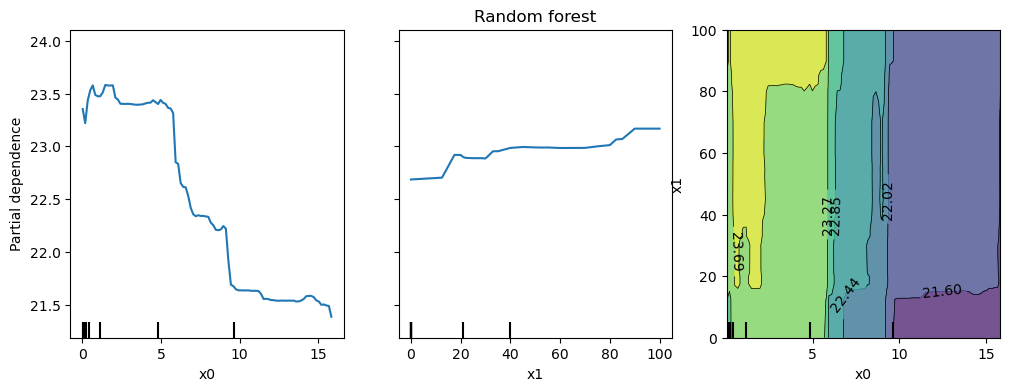

In [33]:
#from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Random forest', fontsize=12)
tree_disp = PartialDependenceDisplay.from_estimator(rf_model, X_train, [0,1,[0,1]], ax=ax)

### 각 그래프를 해석하시오
PDP는 특정 변수들이 모델의 예측값에 미치는 옇향을 시작적으로 보여주는 그래프이다. 각 독립변수가 변화할 때 예측값이 어떻게 변하는지를 분석한다.

1. x축 변수는 x0, y축 변수는 Partial dependence 값 (예측값의 평균적인 변화) -> x0이 작을때 (0~10 근처) 예측값이 23.5 부근에서 유지되다가, 값이 증가할수록 점차 예측값이 감소하는 패턴을 보인다. 또한, x= 10 이후부터는 21.5 근처에서 안정된다. 즉, x0이 증가하면 예측값이 감소하는 경향이 있다.
2. x축 변수는 x1, y축 변수는 Partial dependence 값 (예측값의 평균적인 변화) -> x1이 증가할수록 예측값이 완만하게 상승하는 경향이 있다. x1은 x0과 달리 증가할수록 예측값을 높이는 영향을 미치지만, 그 영향은 크지 않은 것으로 보인다.
3. x축 변수는 x0, y축 변수는 x1, 색깔은 예측값의 변화를 나타낸다. 색깔이 밝을 수록 예측값이 높고, 어두울수록 예측값이 낮다.
x0이 작고 x1이 높은 영역(왼쪽 상단)은 예측값이 높은 경향이 있다. 반대로 x0이 크면 예측값이 낮아지는 패턴을 보인다. x1이 클수록 예측값이 완만하게 증가하는 패턴도 일부 보이지만, x0이 더 중요한 변수로 보이며, x1과의 조합에 따라 예측값이 달라지는 패턴을 보인다.

### Variable Importance Plot

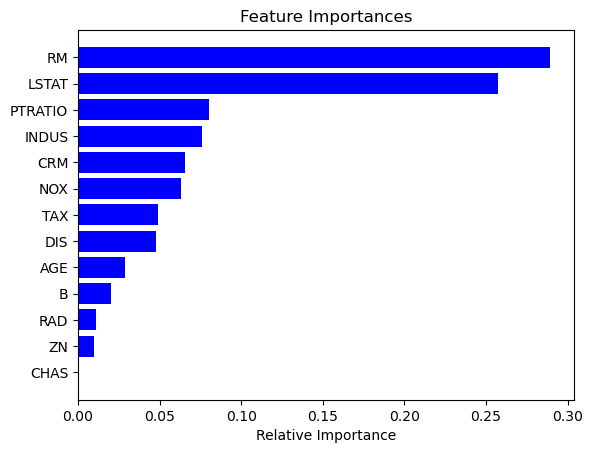

In [35]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()